In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Import our data into pandas from CSV
string_thing = 'Resources/Indicators_of_Anxiety_or_Depression.csv'
MentalHealth_df = pd.read_csv(string_thing, low_memory=False)

MentalHealth_df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",4/23/2020,5/5/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",4/23/2020,5/5/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",4/23/2020,5/5/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",4/23/2020,5/5/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",4/23/2020,5/5/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


In [3]:
# Extracting columns to keep
MH_ByAge_df = MentalHealth_df[["Indicator", "Group", "Subgroup", "State", "Time Period Start Date", "Value","Low CI","High CI"]].dropna().sort_values(by='Time Period Start Date', ascending=True)

MH_ByAge_df.head()

,Indicator,Group,Subgroup,State,Time Period Start Date,Value,Low CI,High CI
4744,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,Hispanic or Latino,United States,1/20/2021,32.1,30.0,34.3
4869,Symptoms of Anxiety Disorder,By State,Virginia,Virginia,1/20/2021,32.7,29.5,36.0
4870,Symptoms of Anxiety Disorder,By State,Washington,Washington,1/20/2021,41.0,37.5,44.6
4871,Symptoms of Anxiety Disorder,By State,West Virginia,West Virginia,1/20/2021,34.7,28.3,41.5
4872,Symptoms of Anxiety Disorder,By State,Wisconsin,Wisconsin,1/20/2021,30.0,25.9,34.4


In [4]:
# Filtering data to only keep 'Symptoms of Anxiety Disorder or Depressive Disorder' in the 'Indicator' column & 
# 'By Age' in the 'Group' column
anxiety_and_depression_df = MH_ByAge_df.loc[(MH_ByAge_df['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder') & (MH_ByAge_df['Group'] == 'By Age')]

print(anxiety_and_depression_df)

                                              Indicator   Group  \
4875  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
4876  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
4877  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
4878  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
4879  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
...                                                 ...     ...   
3350  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
3352  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
3353  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
3354  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
3349  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   

                Subgroup          State Time Period Start Date  Value  Low CI  \
4875       18 - 29 years  United States              1/20/2021   56.9    53.9   
4876       30 - 39 years  United 

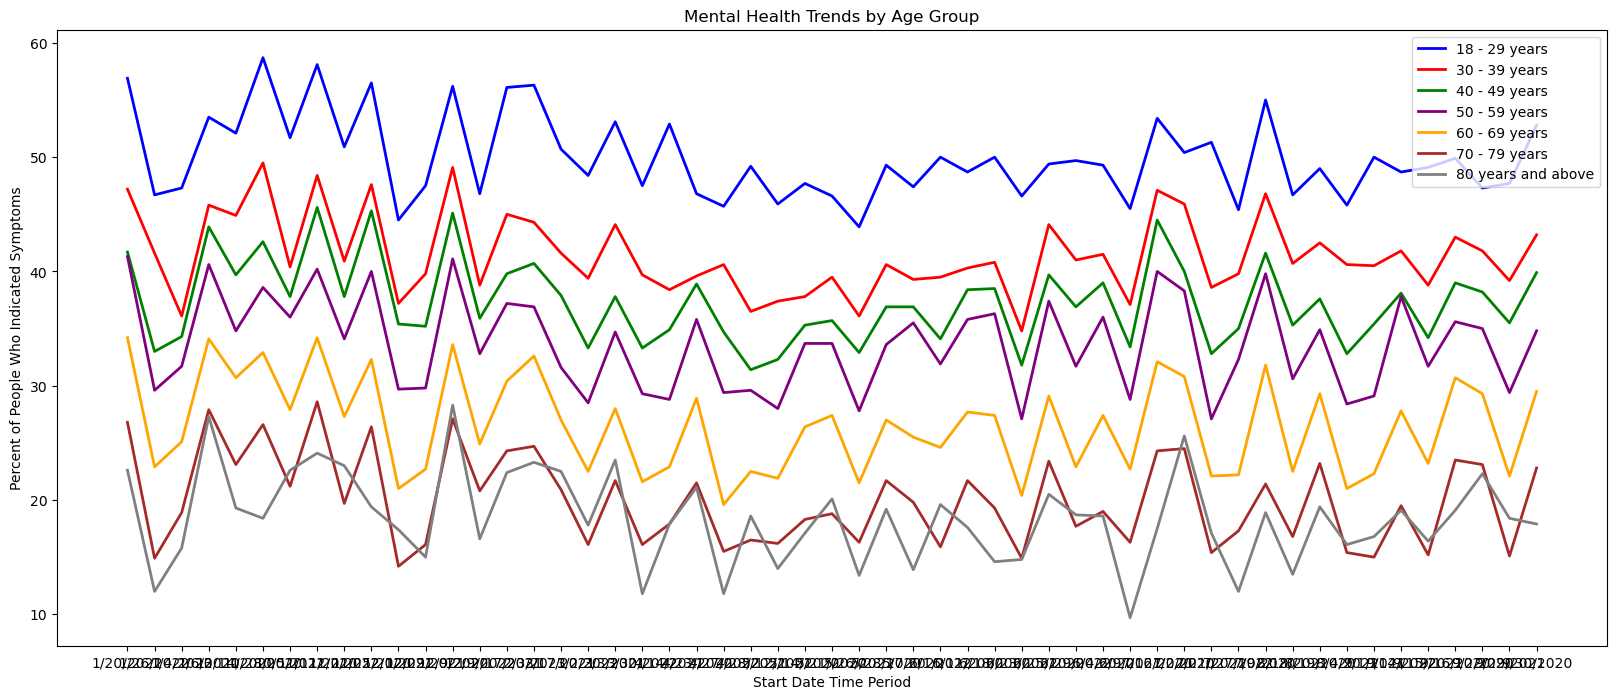

In [5]:
# Create a separate dataframe for each age subgroup
group1 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='18 - 29 years']
group2 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='30 - 39 years']
group3 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='40 - 49 years']
group4 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='50 - 59 years']
group5 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='60 - 69 years']
group6 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='70 - 79 years']
group7 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='80 years and above']

# Resize graph to fit data
plt.figure(figsize=(20, 8))

# Graph each data point
group1, = plt.plot(group1['Time Period Start Date'], group1['Value'], color="blue", label="18 - 29 years", linewidth=2, linestyle='-')
group2, = plt.plot(group2['Time Period Start Date'], group2['Value'], color="red", label="30 - 39 years", linewidth=2, linestyle='-')
group3, = plt.plot(group3['Time Period Start Date'], group3['Value'], color="green", label="40 - 49 years", linewidth=2, linestyle='-')
group4, = plt.plot(group4['Time Period Start Date'], group4['Value'], color="purple", label="50 - 59 years", linewidth=2, linestyle='-')
group5, = plt.plot(group5['Time Period Start Date'], group5['Value'], color="orange", label="60 - 69 years", linewidth=2, linestyle='-')
group6, = plt.plot(group6['Time Period Start Date'], group6['Value'], color="brown", label="70 - 79 years", linewidth=2, linestyle='-')
group7, = plt.plot(group7['Time Period Start Date'], group7['Value'], color="gray", label="80 years and above", linewidth=2, linestyle='-')

# Add title and labels to the plot
plt.title("Mental Health Trends by Age Group")
plt.xlabel("Start Date Time Period")
plt.ylabel("Percent of People Who Indicated Symptoms")

# Add a legend to the plot
plt.legend(loc="upper right")

# Show the plot
plt.show()

In [6]:
# Filtering data to only keep 'Symptoms of Anxiety Disorder or Depressive Disorder' in the 'Indicator' column & 
# 'By Sex' in the 'Group' column
MH_BySex_df = MH_ByAge_df.loc[(MH_ByAge_df['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder') & (MH_ByAge_df['Group'] == 'By Sex')]

print(MH_BySex_df)

                                               Indicator   Group Subgroup  \
4882   Symptoms of Anxiety Disorder or Depressive Dis...  By Sex     Male   
4883   Symptoms of Anxiety Disorder or Depressive Dis...  By Sex   Female   
9299   Symptoms of Anxiety Disorder or Depressive Dis...  By Sex     Male   
9300   Symptoms of Anxiety Disorder or Depressive Dis...  By Sex   Female   
12197  Symptoms of Anxiety Disorder or Depressive Dis...  By Sex     Male   
...                                                  ...     ...      ...   
2935   Symptoms of Anxiety Disorder or Depressive Dis...  By Sex     Male   
8535   Symptoms of Anxiety Disorder or Depressive Dis...  By Sex   Female   
8534   Symptoms of Anxiety Disorder or Depressive Dis...  By Sex     Male   
3356   Symptoms of Anxiety Disorder or Depressive Dis...  By Sex   Female   
3355   Symptoms of Anxiety Disorder or Depressive Dis...  By Sex     Male   

               State Time Period Start Date  Value  Low CI  High CI  
4882 

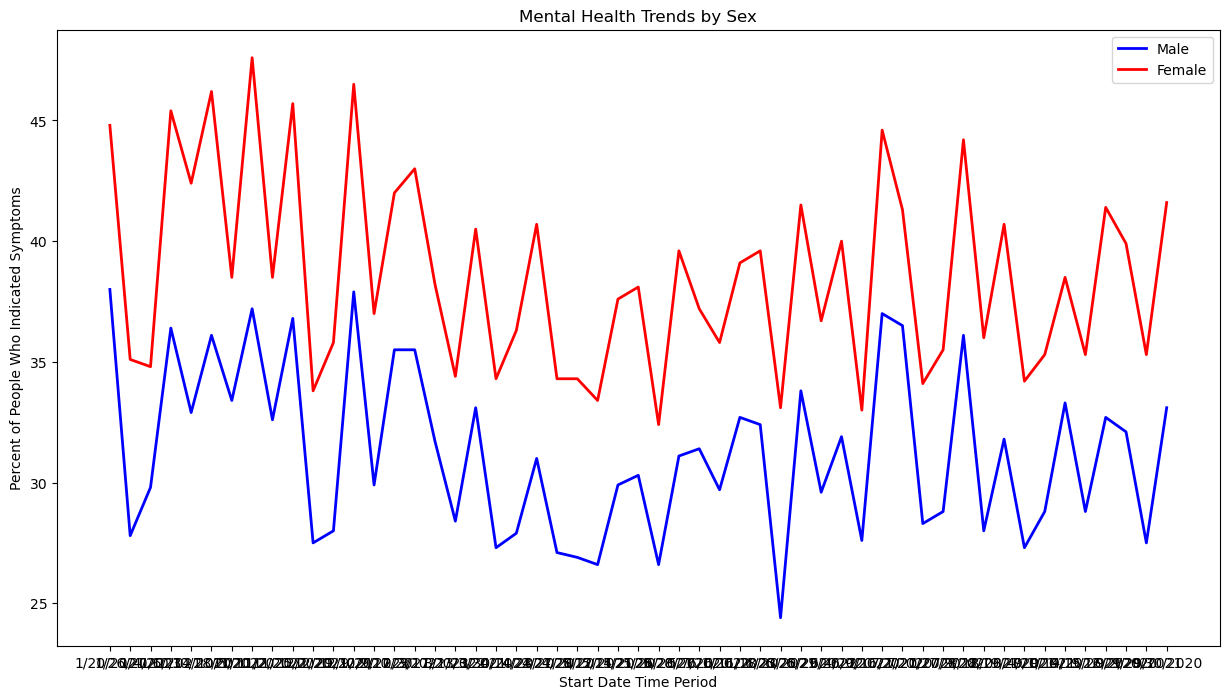

In [7]:
# Define the x and y values from the DataFrame
male = MH_BySex_df.loc[MH_BySex_df['Subgroup']=='Male']
female = MH_BySex_df.loc[MH_BySex_df['Subgroup']=='Female']


# Resize graph to fit data
plt.figure(figsize=(15, 8))

# Graph each data point
male, = plt.plot(male['Time Period Start Date'], male['Value'], color="blue", label="Male", linewidth=2, linestyle='-')
female, = plt.plot(female['Time Period Start Date'], female['Value'], color="red", label="Female", linewidth=2, linestyle='-')

# Add title and labels to the plot
plt.title("Mental Health Trends by Sex")
plt.xlabel("Start Date Time Period")
plt.ylabel("Percent of People Who Indicated Symptoms")

# Add a legend to the plot
plt.legend(loc="upper right")

# Show the plot
plt.show()

In [8]:
# https://data.cdc.gov/NCHS/Indicators-of-Anxiety-or-Depression-Based-on-Repor/8pt5-q6wp